<a href="https://colab.research.google.com/github/rbn-ok/notebooks/blob/main/Chapter03_05mair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from pprint import pprint
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [3]:
datos = load_boston()

In [4]:
datos.data.shape

(506, 13)

In [15]:
# Algoritmo de Aprendizaje OLS:
lr = LinearRegression()  # de la instancia LinearRegression creo un objeto

In [14]:
# Metricas de Evaluacion:

metricas = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y, y_pred:
    sqrt(mean_squared_error(y,y_pred)),
    'MAPE':lambda y, y_pred:
    np.mean(np.abs((y - y_pred) / y))*100,
    'R2': r2_score
}

In [16]:
# Entrenamiento con todos los datos para obtener los coeficientes:
model = lr.fit(datos.data, datos.target)

In [17]:
# Coeficientes del modelo:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [18]:
# Obtencion del termino independiente:
model.intercept_

36.459488385090125

In [20]:
# Validacion y obtencion de las predicciones del modelo:
seed = 42
y_pred = cross_val_predict(lr,datos.data, datos.target,
                           cv = KFold(n_splits=10, shuffle=True, random_state=seed))

In [22]:
# Calculo de las metricas de Evaluacion:
MAE = metricas['MAE'](datos.target, y_pred)
RSME = metricas['RMSE'](datos.target, y_pred)
MAPE = metricas['MAPE'](datos.target, y_pred)
R2 = metricas['R2'](datos.target, y_pred)

In [33]:
import matplotlib
matplotlib.rc('figure', figsize=(10, 5))

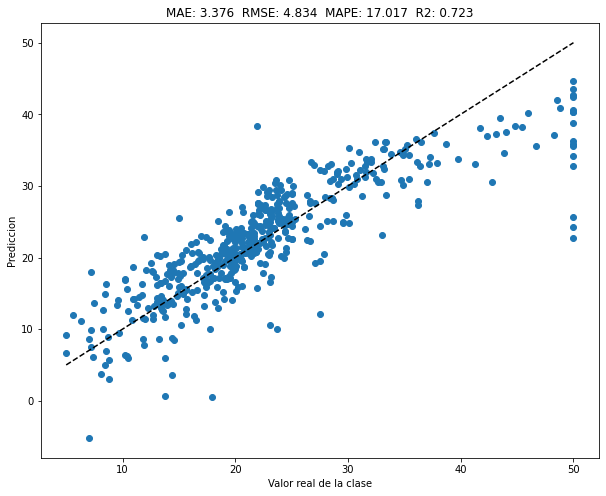

In [35]:
# Graficamos la prediccion vs datos reales:

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(datos.target, y_pred)
ax.plot([datos.target.min(), datos.target.max()],
        [datos.target.min(), datos.target.max()], 'k--')  # La linea no es el modelo: es y = x
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Prediccion')
plt.title('MAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f' % (MAE,RSME, MAPE, R2))
plt.show()

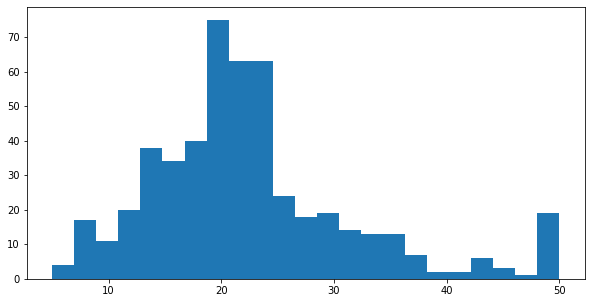

In [36]:
plt.hist(datos.target, bins='auto')
plt.show()

In [38]:
preds = pd.DataFrame({'Actual': datos.target, 'pred': y_pred})
preds = preds.sort_values('Actual')
preds

,Actual,pred
398,5.0,6.701687
405,5.0,9.145701
400,5.6,11.909518
399,6.3,11.104878
414,7.0,-5.208844
...,...,...
166,50.0,36.202911
195,50.0,40.534962
283,50.0,44.660528
225,50.0,38.763909
